# Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

# Data

In [25]:
df = pd.read_csv('Dataset/train.csv') # Read the csv file
df.head() # Display the first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.columns # Display the column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Column info:
<ul>
<li>PassengerId: Index</li>
<li>Survived: Survived(1=yes, 0=no)</li>
<li>Pclass: Ticket Class</li>
<li>Name: Name of the passenger</li>
<li>Sex: Gender</li>
<li>Age: Age</li>
<li>SibSp: Number of siblings / spouses aboard the Titanic</li>
<li>Parch: Number of parents / children aboard the Titanic</li>
<li>Ticket: Ticket Number</li>
<li>Fare: Passenger fare</li>
<li>Cabin: Cabin number</li>
<li>Embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>

# Exploratory Data Analysis

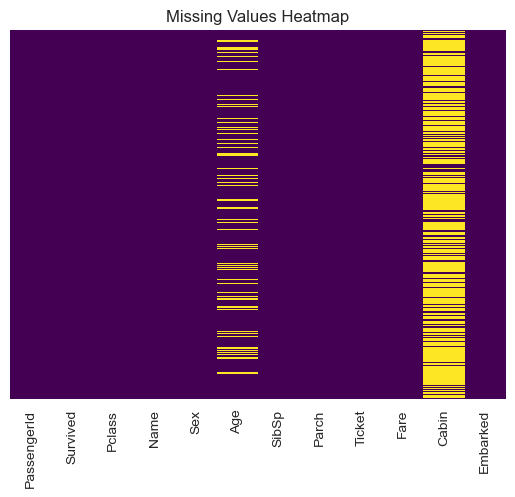

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Check for missing values
plt.title('Missing Values Heatmap') # Set the title of the heatmap
plt.show() # Display the heatmap

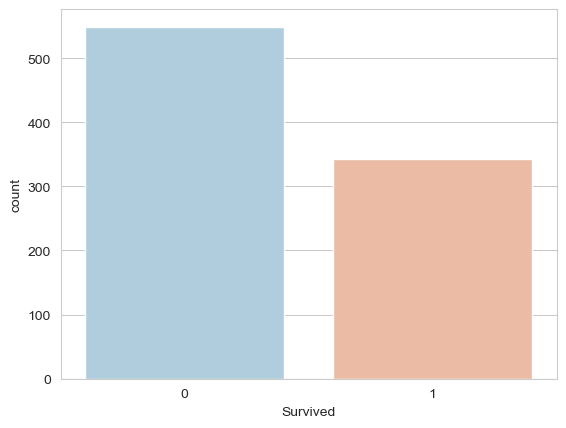

In [28]:
sns.set_style('whitegrid') # Set the style of the plot 
sns.countplot(x='Survived',data=df,palette='RdBu_r') # Plot the count of survived and not survived
plt.show() # Display the plot

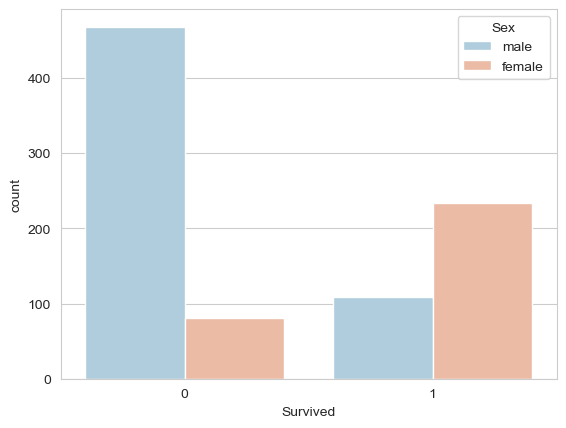

In [29]:
sns.set_style('whitegrid') # Set the style of the plot
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r') # Plot the count of survived and not survived based on Sex
plt.show() # Display the plot

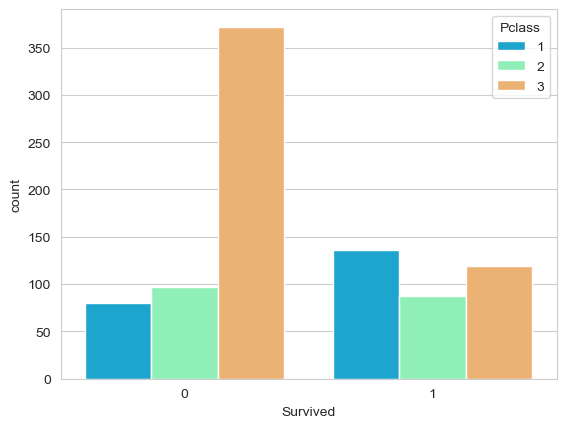

In [30]:
sns.set_style('whitegrid')  # Set the style of the plot
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow') # Plot the count of survived and not survived based on Pclass
plt.show() # Display the plot

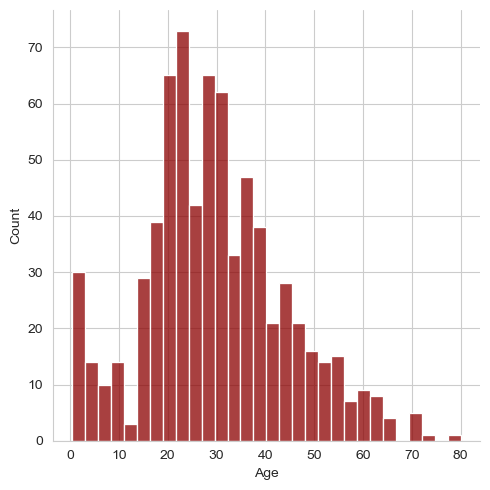

In [31]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=30) # Plot the distribution of Age
plt.show() # Display the plot

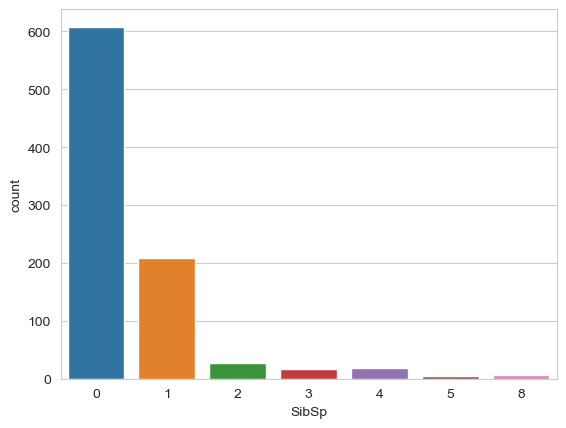

In [32]:
sns.countplot(x='SibSp',data=df) # Plot the count of SibSp
plt.show() # Display the plot

# Data Cleaning

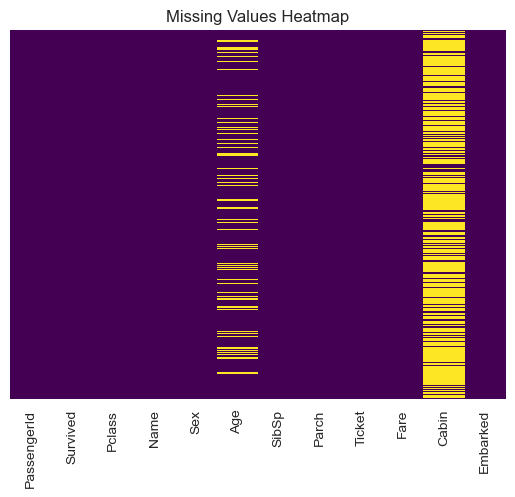

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Check for missing values
plt.title('Missing Values Heatmap') # Set the title of the heatmap
plt.show() # Display the heatmap

In [34]:
def heatmat(data):
    sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Check for missing values
    plt.title('Missing Values Heatmap') # Set the title of the heatmap
    return plt.show()

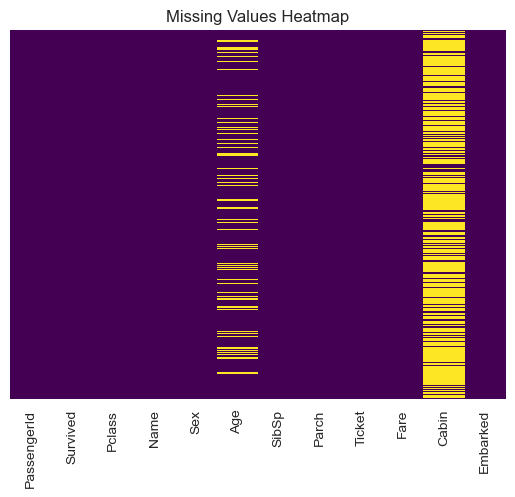

In [35]:
heatmat(df)

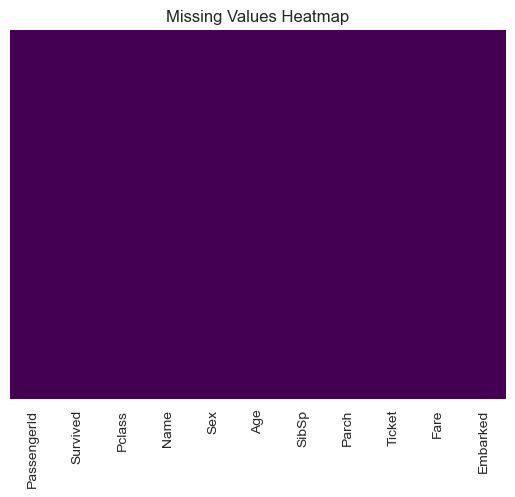

In [36]:
df = df.drop('Cabin',axis=1) # Drop the Cabin column, Because it has a lot of missing values
df = df.dropna( axis = 0, subset = ['Age']) # Drop the rows with missing values in Age column
df = df.dropna( axis = 0, subset = ['Embarked']) # Drop the rows with missing values in Age column
heatmat(df) # Check for missing values

In [37]:
df.isnull().sum() # Check for missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
df.head() # Display the first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) # Drop the PassengerId, Name and Ticket columns
df.head() # Display the first 5 rows of the data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
sex = pd.get_dummies(df['Sex'],drop_first=True) # Convert the gender into dummy variables
embark = pd.get_dummies(df['Embarked'],drop_first=True) # Convert the Embarked into dummy variables

In [41]:
df.drop(['Sex','Embarked'],axis=1,inplace=True) # Dropping thse columns, because we have already converted them into dummy variables
df.head() # Display the first 5 rows of the data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [42]:
df = pd.concat([df,sex,embark],axis=1) # Concatenate the dummy variables with the original dataframe
df.head() # Display the first 5 rows of the data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Data is cleaned and ready for training

# Training

In [43]:
X, y = df.drop('Survived', axis=1), df['Survived'] # Split the data into X and y

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # Split the data into train and test sets

In [45]:
lrm = LogisticRegression() # Create an instance of the Logistic Regression model
lrm.fit(X_train,y_train) # Fit the model on the training data

c:\Users\Abu\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions = lrm.predict(X_test) # Predict the values for the test data

In [48]:
print(classification_report(y_test,predictions)) # Print the classification report

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.76      0.72      0.74        86

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



# Done